<h1>US Traffic Fatality Analysis<br>By: Jack Ross</h1>

![car burning](https://images.radio.com/sunny981sd/burning%20car.jpg)
<h6><a href='https://sunny981sd.radio.com/blogs/aj-sara-morning/cops-virginia-pulled-woman-burning-car'>Image Source</h6>
<br>

<h2>Research Question:<br><br>Why has there been an increase in fatalities from 2014 to 2018 while the rate of seatbelt use has gone up and the rate of cell phone use has dropped? Why does it seem that driving is safer than it was 5 years ago but your chances of dying are higher now?</h2>

<h2>Step 1.) Load the Python libraries that we'll be using for this analysis.</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

<h2>Step 2.) Read in our aggregated crash dataset.</h2>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Traffic-Fatality-Analysis/master/crash-data.csv')

In [3]:
# We would also check for NaN values here but I have taken care of NaN values while putting the data together

<h2>Step 3.) Visualize rows and columns to get a better idea of how different variables correlate.</h2>

In [4]:
df

,Category,2018,2017,2016,2015,2014
0,Fatal Crashes,33654.00,34560.00,34748.00,32538.00,30056.00
1,Drivers,18250.00,18816.00,18717.00,17615.00,16470.00
2,Passengers,5915.00,6237.00,6485.00,6213.00,5766.00
3,Unknown,56.00,74.00,74.00,71.00,71.00
4,Sub Total1,24221.00,25127.00,25276.00,23899.00,22307.00
5,Motorcyclists,4985.00,5229.00,5337.00,5029.00,4594.00
6,Pedestrians,6283.00,6075.00,6080.00,5494.00,4910.00
7,Pedalcyclists,857.00,806.00,853.00,829.00,729.00
8,Other/ Unknown,214.00,236.00,260.00,233.00,204.00
9,Sub Total2,7354.00,7117.00,7193.00,6556.00,5843.00


<h2>Above we can see that the features for the dataset are actually displayed as rows. To avoid errors in pandas I'm going to transpose the dataset so the rows and columns are switched.</h2>

In [5]:
dft = df.T

In [6]:
dft

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Category,Fatal Crashes,Drivers,Passengers,Unknown,Sub Total1,Motorcyclists,Pedestrians,Pedalcyclists,Other/ Unknown,Sub Total2,...,Resident Population (Thousands),Registered Vehicles (Millions),Licensed Drivers (Thousands),Seatbelt Use,Handheld Cellphone Use Rate,Visable Headset Cellphone Use Rate,Visable Manipulation of Handheld Device Rate,Restrain Use of Children Under 8 Rate,Distracted Driving Affected Crashes,Drunk Driving Fatalities (Per 100 million)
2018,33654,18250,5915,56,24221,4985,6283,857,214,7354,...,327167,279.1,227500,89.6,3.2,0.4,2.1,90.4,4637,10511
2017,34560,18816,6237,74,25127,5229,6075,806,236,7117,...,325147,270.4,225346,89.7,2.9,0.4,2,92.8,3166,10908
2016,34748,18717,6485,74,25276,5337,6080,853,260,7193,...,323071,264,221712,90.1,3.3,0.5,2.1,90.9,3526,10967
2015,32538,17615,6213,71,23899,5029,5494,829,233,6556,...,320743,257.9,218084,88.5,3.8,0.6,2.2,89.8,3477,10280
2014,30056,16470,5766,71,22307,4594,4910,729,204,5843,...,318386,252.6,214092,86.7,4.3,0.4,2.2,90.9,3179,9943


<h2>This is almost what we want our data to look like before we analyze it. I've done a little bit more tweaking to the transposed dataset inside the CSV so we won't have to mess with that in Python.</h2>

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/JackRossProjects/Traffic-Fatality-Analysis/master/transposed-crash-data.csv")

In [8]:
df

,Year,Fatal Crashes,Drivers,Passengers,Unknown,Sub Total1,Motorcyclists,Pedestrians,Pedalcyclists,Other/ Unknown,...,Resident Population (Thousands),Registered Vehicles (Millions),Licensed Drivers (Thousands),Seatbelt Use,Handheld Cellphone Use Rate,Visable Headset Cellphone Use Rate,Visable Manipulation of Handheld Device Rate,Restrain Use of Children Under 8 Rate,Distracted Driving Affected Crashes,Drunk Driving Fatalities (Per 100 million)
0,2018,33654.0,18250.0,5915.0,56.0,24221.0,4985.0,6283.0,857.0,214.0,...,327167.0,279.1,227500.0,89.6,3.2,0.4,2.1,90.4,4637.0,10511.0
1,2017,34560.0,18816.0,6237.0,74.0,25127.0,5229.0,6075.0,806.0,236.0,...,325147.0,270.4,225346.0,89.7,2.9,0.4,2.0,92.8,3166.0,10908.0
2,2016,34748.0,18717.0,6485.0,74.0,25276.0,5337.0,6080.0,853.0,260.0,...,323071.0,264.0,221712.0,90.1,3.3,0.5,2.1,90.9,3526.0,10967.0
3,2015,32538.0,17615.0,6213.0,71.0,23899.0,5029.0,5494.0,829.0,233.0,...,320743.0,257.9,218084.0,88.5,3.8,0.6,2.2,89.8,3477.0,10280.0
4,2014,30056.0,16470.0,5766.0,71.0,22307.0,4594.0,4910.0,729.0,204.0,...,318386.0,252.6,214092.0,86.7,4.3,0.4,2.2,90.9,3179.0,9943.0


<h2>Above is our cleaned dataset that we will use for analysis.</h2>

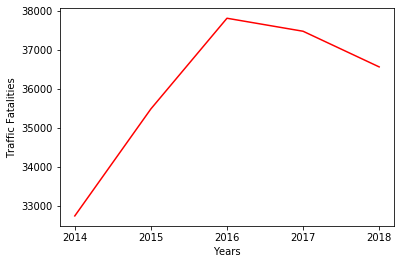

In [9]:
ax = sns.lineplot(x='Year', y='Total', data=df, color='red')
ax.set(xlabel='Years', ylabel='Traffic Fatalities');
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

<h2>As we can see in the graph above, there has been an 8% increase in traffic fatalities since 2014 from 32,744 to 36,560 deaths per year.</h2>

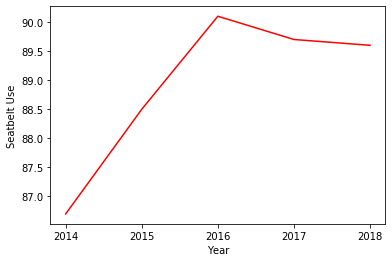

In [10]:
ax = sns.lineplot(x='Year', y='Seatbelt Use',
                  data=df, color='red')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

<h2>There was also a 2.9% rise in seatbelt usage from 2014 to 2018.</h2>

<h3>The data used is an aggregation of National Highway Traffic Safety Administration (NHTSA), Department of Transportation (DOT), and other data. The sources for the data are available <a href="https://github.com/JackRossProjects/Traffic-Fatality-Analysis/blob/master/data-sources.txt" target="_blank">here</a> and the aggregated CSV is available <a href="https://github.com/JackRossProjects/Traffic-Fatality-Analysis/blob/master/crash-data.csv" target="_blank">here</a>.</h3>